In [1]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina' # I use a HiDPI screen

In [2]:
import emcee
import sys
from astropy.table import Table
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
import corner

default_color_list = plt.rcParams['axes.prop_cycle'].by_key()['color'] # get default colors

In [49]:
from classy import Class

# Define your cosmology (what is not specified will be set to CLASS default parameters)
params = {
    'output': 'tCl lCl sCl mPk',
    'l_max_scalars': 10000,
    'lensing': 'yes',
    'selection': 'dirac',
    'selection_mean' : '1.0',
    'non linear' : 'halofit',
    'l_max_lss' : 10000,
    
    'N_ncdm' : 0,
    'accurate_lensing':1,

    'l_switch_limber' : 4000.,
    'halofit_k_per_decade' : 3000.,
    "k_max_tau0_over_l_max":10,
    'perturb_sampling_stepsize':0.01,
    
    'P_k_max_h/Mpc':50,
    'k_per_decade_for_pk':1000,
    'k_per_decade_for_bao':10000
}

# Create an instance of the CLASS wrapper
cosmo = Class()

# Set the parameters to the cosmological code
cosmo.set(params)

# Run the whole code. Depending on your output, it will call the
# CLASS modules more or less fast. For instance, without any
# output asked, CLASS will only compute background quantities,
# thus running almost instantaneously.
# This is equivalent to the beginning of the `main` routine of CLASS,
# with all the struct_init() methods called.
cosmo.compute()

# Access the lensed cl until l=2000
cls = cosmo.lensed_cl(5000)

In [50]:
cls = cosmo.density_cl()

Text(0.5,1,'z=1 Dirac Kernel')

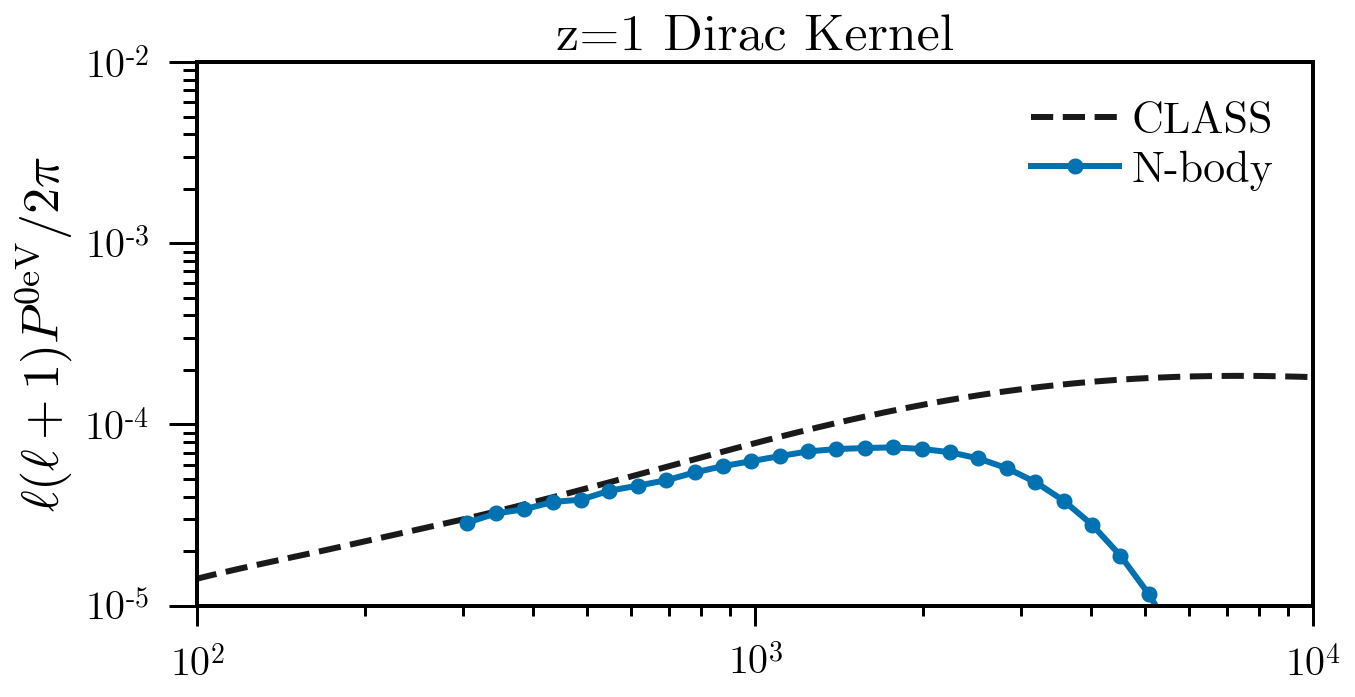

In [62]:
plt.figure(figsize=(10,5))
pref = 0.25 * (cls['ell']+2) * (cls['ell']+1) * (cls['ell']) * (cls['ell']-1) 
pref2 = cls['ell'] * (cls['ell']+1) / (2. * np.pi)
# filt = cls['ell'] > 300

plt.plot( cls['ell'],(pref * pref2 * cls['ll'][0]), '--', label='CLASS' )
plt.yscale('log')
plt.xscale('log')
plt.xlim(1e2,1e4)

from maystats import *
ell, ps_mean = get_real_list( 'PS', noisy='K', redshift='10',  
                               bin_min=300, bin_max=1e4, smoothing='1.00', binscale='log' )

pref2 = ell * (ell+1) / (2. * np.pi)
plt.plot(  ell, pref2 * np.mean(ps_mean[0], axis=0) , '.-', markersize=10, label='N-body')
plt.ylabel(r'$\ell (\ell+1) P^{\mathrm{0eV}} / 2 \pi$')
plt.ylim(1e-5,1e-2)
plt.legend()
plt.title('z=1 Dirac Kernel')

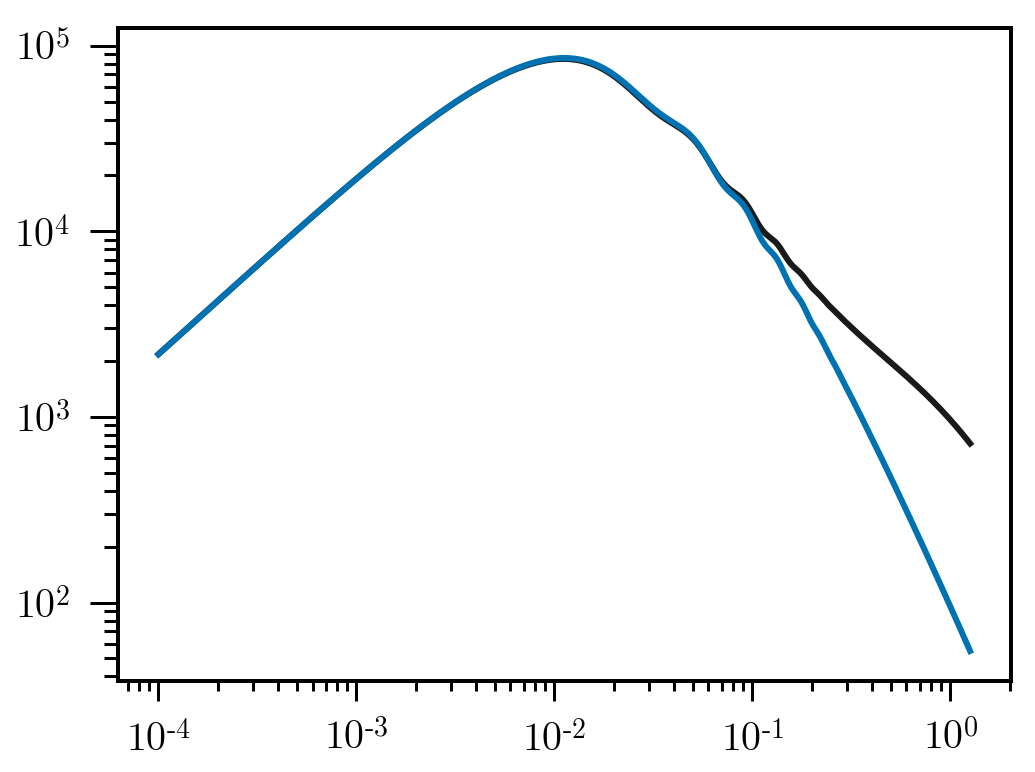

In [19]:

k = 10**np.linspace(-4,0.1,1000)
Pk1 = np.array([cosmo.pk(ki, 0) for ki in k])
plt.plot( k, Pk1, '-' )


Pk2 = np.array([cosmo.pk_lin(ki, 0) for ki in k])
plt.plot( k, Pk2, '-' )

plt.xscale('log')
plt.yscale('log')

In [57]:
# Print on screen to see the output
# It is a dictionnary that contains the fields: tt, te, ee, bb, pp, tp

# plot something with matplotlib...

# Clean CLASS (the equivalent of the struct_free() in the `main`
# of CLASS. This step is primordial when running in a loop over different
# cosmologies, as you will saturate your memory very fast if you ommit
# it.
cosmo.struct_cleanup()

# If you want to change completely the cosmology, you should also
# clean the arguments, otherwise, if you are simply running on a loop
# of different values for the same parameters, this step is not needed
cosmo.empty()